## Logistic Regression 개념 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv("data/customerChurn.csv")

In [3]:
customer.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [4]:
X = customer[['Frequency']]
y = (customer["Churn"] == 'Yes').astype(np.int) # Yes면 1 No 면 0

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [6]:
X.describe()

,Frequency
count,5000.000000
mean,19.375200
std,13.256922
min,2.000000
25%,9.000000
50%,16.000000
75%,28.000000
max,50.000000


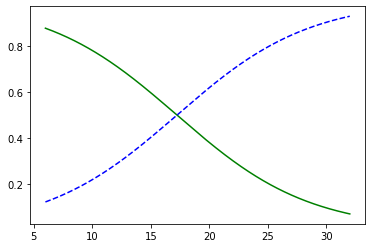

In [7]:
X_new = np.linspace(6,32,1000).reshape(-1,1)   # 균등분포 데이터
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Yes")
plt.plot(X_new, y_proba[:,0], "b--", label="No")

In [8]:
X = customer[['Frequency','Recency']]
y = (customer["Churn"] == 'Yes').astype(np.int) # Yes면 1 No 면 0

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

C:\Users\eunbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Purchase Recency')

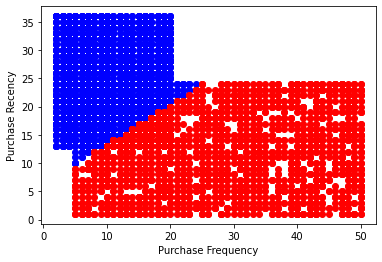

In [10]:
y_predict = log_reg.predict(X)
X['predict'] = y_predict
X_1 = X[X['predict']==1].copy()
X_0 = X[X['predict']==0].copy()
plt.plot(X_1['Frequency'], X_1['Recency'], 'bo')
plt.plot(X_0['Frequency'], X_0['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

## 계수값 확인 

In [11]:
import statsmodels.api as sm

X = customer[['Frequency','Recency','Monetary']]
y = (customer["Churn"] == 'Yes').astype(np.int)

logit_model=sm.Logit(y,X)   # 로지스틱 회귀분석 모형 선언
result=logit_model.fit()    # 로지스틱 회귀분석 모형 학습
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.146362
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.789    
Dependent Variable: Churn            AIC:              1469.6236
Date:               2020-09-19 17:50 BIC:              1489.1752
No. Observations:   5000             Log-Likelihood:   -731.81  
Df Model:           2                LL-Null:          -3465.7  
Df Residuals:       4997             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Frequency   -0.1721    0.0086  -19.9131  0.0000  -0.1890  -0.1551
Recency      0.3118    0.0112   27.9123  0.0000   0.2899   0.3337
Monetary

## 로지스틱 회귀분석 성과 측정

In [12]:
from sklearn.model_selection import train_test_split

X = customer[['Frequency','Recency']]
y = (customer["Churn"] == 'Yes').astype(np.int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

log_reg = LogisticRegression().fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(log_reg.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(log_reg.score(X_test, y_test)))

학습 집합 정확도: 0.879
테스트 집합 정확도: 0.855


### 다항 로지스틱스 회귀 (소프트맥스 회귀)
- 여러개의 이진분류기를 훈련시켜 연결하지 않고 직접 다중 클래스 분류
- 비용함수: 크로스 엔트로피
- 모형이 정답 범주에 대해서는 높은 확률을 갖고 다른 범주에 대해서는 낮은 확률을 추정하도록 만드는 것이 목적

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

telecom = pd.read_csv("data/telecom.csv")

In [90]:
telecom.head()

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,0,5.24640,7.51510,86.32780,0,CH,FreeLocal,Standard,57,F,M,2,27535.3,Y,Vol
1,3,0.00000,0.00000,3.94229,0,CC,Budget,Intnl_discount,50,F,S,2,64632.3,N,InVol
2,4,5.55564,0.00000,9.36347,1,CC,Budget,Intnl_discount,68,F,M,2,81000.9,N,Vol
3,8,14.01930,5.68043,29.80650,0,CC,Budget,Standard,34,M,S,0,87467.1,Y,Current
4,10,13.66400,2.95642,32.63810,0,CC,FreeLocal,Intnl_discount,60,M,M,2,83220.6,N,Vol


In [91]:
X = telecom.iloc[:,np.r_[1,2,3,4,8,11,12]]
y = telecom["CHURNED"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [93]:
## sklearn.LogisticRegression: 이진분류에 사용
## multi_class='multinomial': 다항 로지스틱 회귀에 활용

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
softmax_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [94]:
y_prob = softmax_reg.predict_proba(X_test)

In [95]:
y_prob

array([[3.11735790e-01, 7.14036781e-03, 6.81123842e-01],
       [4.38743042e-01, 3.41179480e-01, 2.20077478e-01],
       [1.82426554e-02, 9.66954439e-01, 1.48029055e-02],
       ...,
       [3.68506140e-01, 3.88560389e-01, 2.42933471e-01],
       [6.11413120e-01, 1.44508356e-03, 3.87141796e-01],
       [6.54543528e-01, 1.04742724e-25, 3.45456472e-01]])

In [96]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_p = lb.fit_transform(y_test)

In [97]:
y_p

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [98]:
from sklearn.metrics import log_loss
log_loss(y_p, y_prob)

0.6685503623004708

In [99]:
softmax_reg.score(X_test,y_test)

0.7189189189189189

### 분류 성과 측정

In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

customer = pd.read_csv("data/customerChurn.csv")

X = customer[['Frequency','Recency','Monetary']]
y = (customer["Churn"] == 'Yes').astype(np.int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

log_reg = LogisticRegression().fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[701,  54],
       [ 37, 708]], dtype=int64)

In [102]:
print("테스트 집합 정확도: {:.3f}".format(log_reg.score(X_test, y_test)))

from sklearn.metrics import accuracy_score

print("테스트 집합 accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

테스트 집합 정확도: 0.939
테스트 집합 accuracy: 0.939


In [103]:
# 정밀도 : 양성 예측의 정확도

from sklearn.metrics import precision_score

print("테스트 집합 정밀도: {:.3f}".format(precision_score(y_test, y_pred)))

테스트 집합 정밀도: 0.929


In [104]:
# 재현율 : 정확하게 분류한 양성 데이터의 비율
# 실제 양성인 데이터를 얼마나 찾아내었는지를 뜻함
# 민감도 / 진짜 양성 비율(TPR) 이라고도 함

from sklearn.metrics import recall_score

print("테스트 집합 재현율: {:.3f}".format(recall_score(y_test, y_pred)))

테스트 집합 재현율: 0.950


In [105]:
# 정밀도와 재현율의 상충관계 (trade off)
# 아래와 같이 대출승인에 대해 확률값에 따라 데이터를 정렬해 놓음
# 여러가지 임계값 기준에 따라 양성, 음성을 분류하는 경우에 정밀도와 재현율 값이 변화하며, 서로 상충관계에 있음

In [106]:
# 정밀도와 재현율의 상충관계
# 정밀도와 재현율의 조화평균을 통해 하나의 지표인 F1점수 고안

from sklearn.metrics import f1_score

print("테스트 집합 f1 점수: {:.3f}".format(f1_score(y_test, y_pred)))

테스트 집합 f1 점수: 0.940


In [107]:
y_score = log_reg.predict_proba(X_test)
y_score[:,1]

array([0.99745983, 0.70530135, 0.87912835, ..., 0.20649292, 0.94107664,
       0.84001802])

In [108]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score[:,1])

# 1일 확률만 입력

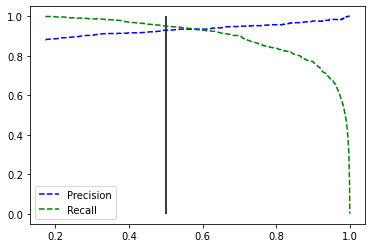

In [109]:
def plot_precision_recall_vs_threshold(precisions, recalls, threholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.vlines(x=0.5,ymin=0,ymax=1)
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC 곡선

- x축은 거짓 양성 비율이고 y축은 진짜 양성 비율인 곡선
- 진짜 양성 비율 = 재현율
- 양성으로 잘못 분류된 음성 데이터의 비율 = FPR = 1 - 진짜음성비율(TNR, 특이도)
- ROC곡선은 민감도(재현율)에 대한 1 - 특이도 그래프

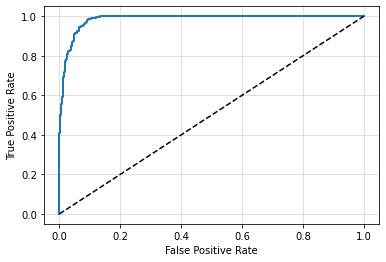

In [110]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([[0],[1]], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(which='major', axis='both', alpha=0.5)
    
plot_roc_curve(fpr, tpr)
plt.show()

In [111]:
# AUC : 곡선 아래의 면적
# 완벽하게 분류 -> AUC=1 / 완전 랜덤 분류 -> AUC=0.5

from sklearn.metrics import roc_auc_score

print("테스트 집합 AUC 점수: {:.3f}".format(roc_auc_score(y_test, y_pred)))

테스트 집합 AUC 점수: 0.939


### 연습문제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
gc = pd.read_csv('data/GermanCredit.csv')

gc.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETIRING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,True
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,False
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,True
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,True
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,False


- OBS : 관찰번호 
- CHK_ACCT : (범주형) 체크 계좌 상태 (0: < 0 DM, 1: 0 < ... < 200 DM, 2: => 200 DM, 3: No checking account) # DM은 eur로 통합되기 전의 독일의 화폐단위 Deutsche Mark를 뜻함
- DURATION : (수치형) 신용 대출 기간(개월)
- HISTORY : (범주형) 신용 거래 내역 (0: 신용 거래 내역 없음, 1: 우리 은행의 신용 대출 모두 갚음, 2: 모든 은행의 신용 대출 모두 갚음, 3: 연체 이력 있음, 4: 유의 계좌)
- NEW_CAR: (범주형) 신용 대출의 목적이 신차 구입인 경우 (0: No, 1: Yes)
- USED_CAR: (범주형) 신용 대출의 목적이 중고차 구입인 경우 (0: No, 1: Yes)
- FURNITURE: (범주형) 신용 대출의 목적이 가구 구입인 경우 (0: No, 1: Yes)
- RADIO/TV: (범주형) 신용 대출의 목적이 RADIO 또는 TV 구입인 경우 (0: No, 1: Yes)
- EDUCATION: (범주형) 신용 대출의 목적이 학자금 관련인 경우 (0: No, 1: Yes)
- RETRAINING: (범주형) 신용 대출의 목적이 재취업 목적인 경우 (0: No, 1: Yes)
- AMOUNT: (수치형) 신용 대출 금액 
- SAV_ACCT: (범주형) 저축 계좌 상태 (0: < 100DM, 1: 100<= ... <500DM, 2: 500<= ... <1000DM, 3: => 1000DM, 4: Unknown/No savings account)
- EMPLOYMENT: (범주형) 현재 취업 상태 (0: 무직, 1: < 1년, 2: 1<= ... < 4년, 3: 4<= ... < 7년, 4: >= 7년)
- INSTALL_RATE: (수치형) 가처분 소득대비 상환금액 비율
- MALE_DIV: (범주형) 남성이며 이혼상태인 경우 (0: No, 1: Yes)
- MALE_SINGLE: (범주형) 남성이며 싱글인 경우 (0: No, 1: Yes)
- MALE_MAR_WID: (범주형) 남성이며 혼인한 경우 또는 홀아비 (0: No, 1: Yes)
- CO-APPLICANT: (범주형) 공동신청자가 있는 경우 (0: No, 1: Yes)
- GUARANTOR: (범주형) 보증인이 있는 경우  (0: No, 1: Yes)
- PRESENT_RESIDENT: (범주형) 현재 주소지 주거 경력 (0: <= 1년, 1: 1<= ... <= 2년, 2: 2<= ... <= 3년, 3: > 4년)
- REAL_ESTATE: (범주형) 부동산 보유 여부 (0: No, 1: Yes)
- PROP_UNKN_NONE: (범주형) 재산을 보유하지 않은 경우 (0: No, 1: Yes)
- AGE: (수치형) 나이
- OTHER_INSTALL: (범주형) 다른 신용대출 보유 여부 (0: No, 1: Yes)
- RENT: (범주형) 주택 임대 여부 (0: No, 1: Yes)
- OWN_RES: (범주형) 자가 주택 보유 여부 (0: No, 1: Yes)
- NUM_CREDITS: (수치형) 기존 신용대출 수
- JOB: (범주형) (0: 비숙련공 계약직, 1: 비숙련공 정규직, 2: 숙련공/사무직, 3: 관리직/자영업/기술직)
- NUM_DEPENDENTS: (수치형) 가족의 수 
- TELEPHONE: (범주형) 전화보유 여부 (0: No, 1: Yes)
- FOREIGN: (범주형) 외국인 노동자 여부 (0: No, 1: Yes)
- RESPONSE: (범주형) 신용도가 좋음 (0: No, 1: Yes)

### RESPONSE가 종속변수이며, 독립변수는 수치형과 이분형 범주형 변수 중에서 선발. 여러 범주를 갖는 범주형 변수의 사용방안은 나중에 OneHotEncoding을 학습한 이후에 활용예정

In [37]:
X = gc.iloc[:,np.r_[2,4:11,13:19,20:27,28:31]]  # np.r_ 은 비연속적으로 컬럼을 선택할 때 활용 
y = gc['RESPONSE']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DURATION         1000 non-null   int64
 1   NEW_CAR          1000 non-null   int64
 2   USED_CAR         1000 non-null   int64
 3   FURNITURE        1000 non-null   int64
 4   RADIO/TV         1000 non-null   int64
 5   EDUCATION        1000 non-null   int64
 6   RETIRING         1000 non-null   int64
 7   AMOUNT           1000 non-null   int64
 8   INSTALL_RATE     1000 non-null   int64
 9   MALE_DIV         1000 non-null   int64
 10  MALE_SINGLE      1000 non-null   int64
 11  MALE_MAR_or_WID  1000 non-null   int64
 12  CO-APPLICANT     1000 non-null   int64
 13  GUARANTOR        1000 non-null   int64
 14  REAL_ESTATE      1000 non-null   int64
 15  PROP_UNKN_NONE   1000 non-null   int64
 16  AGE              1000 non-null   int64
 17  OTHER_INSTALL    1000 non-null   int64
 18  RENT     

### 독립변수 후보들과 종속변수간의 관계 탐색, 종속변수가 범주형이므로 범주에 따른 독립변수 후보들의 값의 분포에 차이가 있는 지 검토

- DURATION(수치형/신용 대출 기간(개월))과 RESPONSE

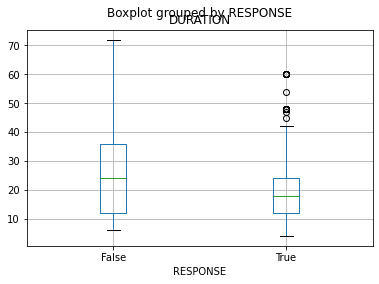

In [39]:
gc.boxplot(column=['DURATION'], by="RESPONSE") # RESPONSE 값에 따른 DURATION 분포 차이가 보임 

- AMOUNT(수치형/신용 대출 금액)와 RESPONSE

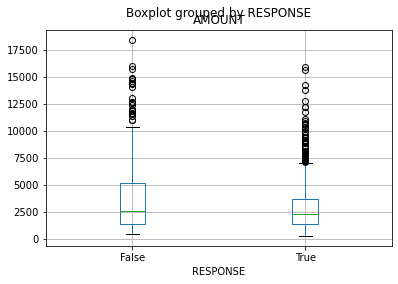

In [40]:
gc.boxplot(column=['AMOUNT'], by="RESPONSE") 
# RESPONSE 값에 따른 AMOUNT 분포는 중앙값은 비슷하지만 신용도가 좋지 않은 그룹이 더 많은 금액을 신청하였음

- INSTALL_RATE(수치형/가처분 소득대비 상환금액 비율)과 RESPONSE

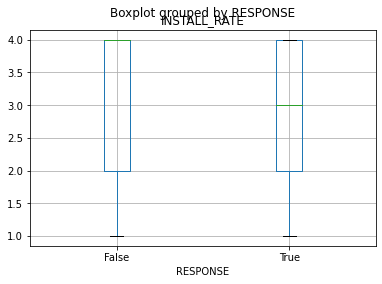

In [41]:
gc.boxplot(column=['INSTALL_RATE'], by="RESPONSE") 

# INSTALL_RATE 값의 범위가 RESPONSE에 따라 상이해 보이지 않음. 중앙값은 차이가 보임.

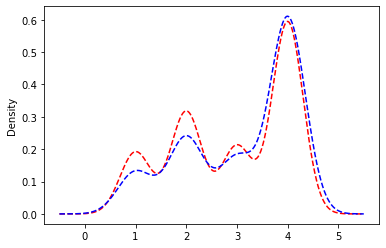

In [42]:
gcYES = gc[gc.RESPONSE == True]
gcNO = gc[gc.RESPONSE == False]

gcYES['INSTALL_RATE'].plot(kind='kde', style='r--') 
gcNO['INSTALL_RATE'].plot(kind='kde', style='b--') 

## 신용도가 좋지 않은 신청자들의 INSTALL_RATE 값이 좀 더 높은 경향
# kde : 밀도함수

- NEW_CAR(범주형/신용 대출의 목적이 신차 구입인 경우 (0: No, 1: Yes))와 RESPONSE

In [43]:
counts = pd.crosstab(gc.RESPONSE, gc.NEW_CAR)
counts

NEW_CAR,0,1
RESPONSE,,
False,211,89
True,555,145


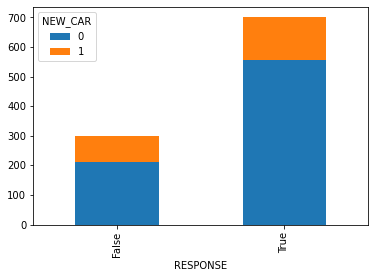

In [44]:
counts.plot(kind='bar', stacked=True)

In [45]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 신차 구매 비율

0.2966666666666667

In [46]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 신차 구매 비율 

0.20714285714285716

- USED_CAR (범주형/신용 대출의 목적이 중고차 구입인 경우 (0: No, 1: Yes))와 RESPONSE

In [47]:
counts = pd.crosstab(gc.RESPONSE, gc.USED_CAR)
counts

USED_CAR,0,1
RESPONSE,,
False,283,17
True,614,86


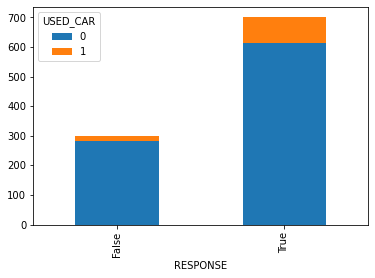

In [48]:
counts.plot(kind='bar', stacked=True)

In [49]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 중고차 구매 비율

0.056666666666666664

In [50]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 중고차 구매 비율 

0.12285714285714286

- FOREIGN (범주형/외국인 노동자 여부 (0: No, 1: Yes))과 RESPONSE

In [51]:
counts = pd.crosstab(gc.RESPONSE, gc.FOREIGN)
counts

FOREIGN,0,1
RESPONSE,,
False,296,4
True,667,33


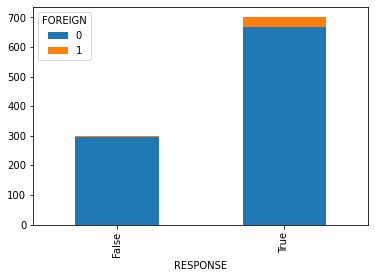

In [52]:
counts.plot(kind='bar', stacked=True)

In [53]:
counts[1][0] / (counts[0][0] + counts[1][0]) # FALSE 일때 FOREIGN 비율

0.013333333333333334

In [54]:
counts[1][1] / (counts[0][1] + counts[1][1]) # TRUE 일때 FOREIGN 비율 

0.047142857142857146

### 모형 학습 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [57]:
print("Predictions: {}".format(clf.predict(X_test)))

Predictions: [ True  True False False  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True False False False  True
  True  True  True  True False  True False  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True False  True False  True  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True False
  True  True  True False  True  True  True False  True  True False  True
  True  True False  True False False  True  True  True  True  True  True
  True  True  True False  True  True False  True False False False  True
 False  True  True  True  True  True  

In [58]:
print("Predictions: {}".format(clf.predict_proba(X_test)))

Predictions: [[0.3114672  0.6885328 ]
 [0.19994062 0.80005938]
 [0.80628636 0.19371364]
 [0.76850872 0.23149128]
 [0.33797678 0.66202322]
 [0.18428233 0.81571767]
 [0.21022012 0.78977988]
 [0.29734476 0.70265524]
 [0.11652075 0.88347925]
 [0.50530427 0.49469573]
 [0.59803768 0.40196232]
 [0.24282288 0.75717712]
 [0.05770109 0.94229891]
 [0.35862406 0.64137594]
 [0.15384416 0.84615584]
 [0.25289991 0.74710009]
 [0.31297237 0.68702763]
 [0.11554222 0.88445778]
 [0.12947478 0.87052522]
 [0.48879622 0.51120378]
 [0.73561919 0.26438081]
 [0.62423707 0.37576293]
 [0.85524659 0.14475341]
 [0.16751563 0.83248437]
 [0.1856299  0.8143701 ]
 [0.39858755 0.60141245]
 [0.03279546 0.96720454]
 [0.39424295 0.60575705]
 [0.56289272 0.43710728]
 [0.07948547 0.92051453]
 [0.5780539  0.4219461 ]
 [0.20911368 0.79088632]
 [0.22264694 0.77735306]
 [0.31243518 0.68756482]
 [0.45341558 0.54658442]
 [0.31878327 0.68121673]
 [0.52431012 0.47568988]
 [0.20643793 0.79356207]
 [0.29272996 0.70727004]
 [0.14529718

### 분류 성과 측정

In [59]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 25,  49],
       [ 28, 148]], dtype=int64)

In [60]:
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.692


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision_score(y_test, y_pred)

0.751269035532995

In [62]:
recall_score(y_test,y_pred)

0.8409090909090909

In [63]:
f1_score(y_test,y_pred)

0.7935656836461126

In [64]:
roc_auc_score(y_test,y_pred)

0.5893734643734644

In [65]:
clf_cv = LogisticRegression(max_iter=500)

scores = cross_val_score(clf_cv, X, y, scoring='roc_auc', cv=5)
scores

array([0.6722619 , 0.72654762, 0.70809524, 0.7372619 , 0.69880952])

In [66]:
scores.mean()

0.7085952380952382